<a href="https://colab.research.google.com/github/samuelrodriguesi/topicos_especiais_4/blob/main/Atividade_2_Samuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Etapa 1: Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [10]:
np.random.seed(42)
n = 150

temperatura_media = np.random.normal(loc=215, scale=40, size=n)  # média mais centralizada, menor dispersão
frequencia_frenagens = np.random.normal(loc=35, scale=8, size=n).astype(int)  # distribuição normal, não uniforme


# Fórmula com ruído (quanto maior a temperatura e frequência, maior o desgaste)
taxa_desgaste = (0.01 * temperatura_media) + (0.2 * frequencia_frenagens) + np.random.normal(0, 0.5, n)

df = pd.DataFrame({
    'temperatura_media': temperatura_media,
    'frequencia_frenagens': frequencia_frenagens,
    'taxa_desgaste': taxa_desgaste
})

df.head()


,temperatura_media,frequencia_frenagens,taxa_desgaste
0,234.868566,37,9.334188
1,209.469428,37,9.214604
2,240.907542,29,8.582722
3,275.921194,36,10.264397
4,205.633865,37,9.445888


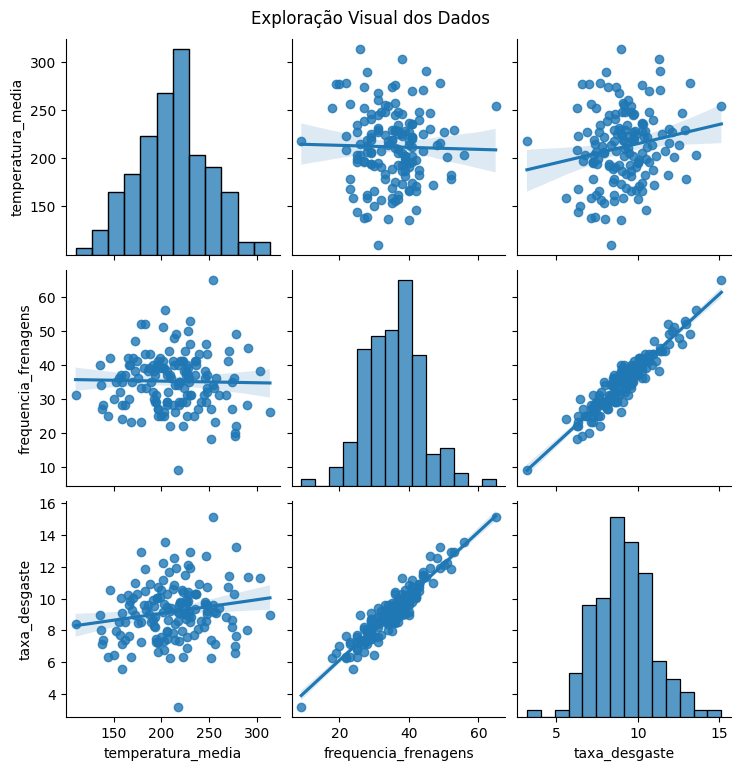

In [11]:
sns.pairplot(df, kind='reg')
plt.suptitle('Exploração Visual dos Dados', y=1.02)
plt.show()


In [12]:
X = df[['temperatura_media', 'frequencia_frenagens']]
y = df['taxa_desgaste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)


In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.2f}')
print(f'MAE: {mae:.3f} mm/1000 km')
print(f'RMSE: {rmse:.3f} mm/1000 km')


R²: 0.89
MAE: 0.355 mm/1000 km
RMSE: 0.463 mm/1000 km


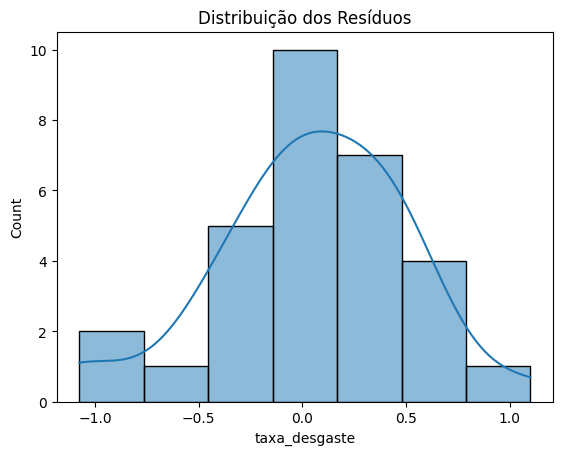

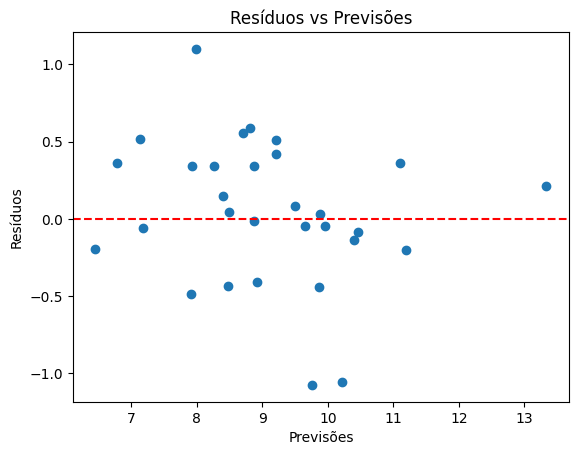

In [14]:
residuos = y_test - y_pred

sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()

plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Previsões")
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.show()


In [15]:
#- O modelo teve bom desempenho ao prever a taxa de desgaste.
#- As duas variáveis são influentes no comportamento da pastilha de freio.
#- O modelo é útil para prever desgaste em cenários de uso diferentes e planejar trocas preventivas.

#**Melhorias sugeridas:**
#- Incluir tipo de material da pastilha como variável categórica.
#- Testar interações entre temperatura e frequência.
#- Usar regressão regularizada para reduzir sensibilidade a outliers.
